<a href="https://colab.research.google.com/github/mahabdoli/Tumor-Detection-Supervised-Autoencoder-Classifier/blob/main/SqueezeNet_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/med project/med/src')
sys.path.append('/content/drive/MyDrive/med project/med/outputs')
sys.path.append('/content/drive/MyDrive/med project/med/input')

In [ ]:
import torch
from datasets import *
from model import *
from utils import *
from train import *

In [ ]:
dataset_train, dataset_valid, dataset_classes = get_datasets()

In [ ]:
subset_train = list(range(0,2000))
subset_valid = list(range(0,700))

dataset_trainsubset = torch.utils.data.Subset(dataset_train, subset_train)
dataset_validsubset = torch.utils.data.Subset(dataset_valid, subset_valid)

In [ ]:
print(f"[INFO]: Number of training images: {len(dataset_trainsubset)}")
print(f"[INFO]: Number of validation images: {len(dataset_validsubset)}")
print(f"[INFO]: Class names: {dataset_classes}\n")

[INFO]: Number of training images: 2000
[INFO]: Number of validation images: 700
[INFO]: Class names: ['notumor', 'tumor']



In [ ]:
# Load the training and validation data loaders.
train_loader, valid_loader = get_data_loaders(dataset_trainsubset, dataset_validsubset)

In [ ]:
# Learning_parameters. 
lr = 0.0001
epochs = 15
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}")
print(f"Learning rate: {lr}")
print(f"Epochs to train for: {epochs}\n")

Computation device: cpu
Learning rate: 0.0001
Epochs to train for: 15



In [ ]:
model2 = build_model(pretrained=True,fine_tune=True,num_classes=len(dataset_classes)).to(device)

[INFO]: Loading pre-trained weights


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth


  0%|          | 0.00/4.78M [00:00<?, ?B/s]

In [ ]:
# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model2.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(p.numel() for p in model2.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

736,450 total parameters.
1,026 training parameters.


In [ ]:
# Optimizer.
optimizer = optim.Adam(model2.parameters(), lr=lr)
# Loss function.
criterion2 = nn.CrossEntropyLoss()

In [ ]:
# Lists to keep track of losses and accuracies.
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# Start the training.
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model2, train_loader,optimizer, criterion2)
    valid_epoch_loss, valid_epoch_acc = validate(model2, valid_loader, criterion2, supervised=False)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)
    time.sleep(5)

[INFO]: Epoch 1 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 2.172, training acc: 75.600
Validation loss: 7.468, validation acc: 57.571
--------------------------------------------------
[INFO]: Epoch 2 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.606, training acc: 84.300
Validation loss: 6.724, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 3 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.171, training acc: 86.300
Validation loss: 5.640, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 4 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 1.101, training acc: 86.300
Validation loss: 4.500, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 5 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.874, training acc: 88.150
Validation loss: 3.444, validation acc: 57.857
--------------------------------------------------
[INFO]: Epoch 6 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.747, training acc: 89.400
Validation loss: 2.274, validation acc: 57.857
--------------------------------------------------
[INFO]: Epoch 7 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.565, training acc: 90.300
Validation loss: 1.838, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 8 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.639, training acc: 88.500
Validation loss: 1.203, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 9 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.487, training acc: 91.400
Validation loss: 1.149, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 10 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.551, training acc: 89.650
Validation loss: 0.968, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 11 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.492, training acc: 90.100
Validation loss: 0.830, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 12 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.482, training acc: 89.700
Validation loss: 0.826, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 13 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.425, training acc: 90.950
Validation loss: 0.812, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 14 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.424, training acc: 91.300
Validation loss: 0.778, validation acc: 57.714
--------------------------------------------------
[INFO]: Epoch 15 of 15
Training


  0%|          | 0/63 [00:00<?, ?it/s]

Validation


  0%|          | 0/22 [00:00<?, ?it/s]

Training loss: 0.432, training acc: 91.000
Validation loss: 0.804, validation acc: 57.714
--------------------------------------------------


TRAINING COMPLETE


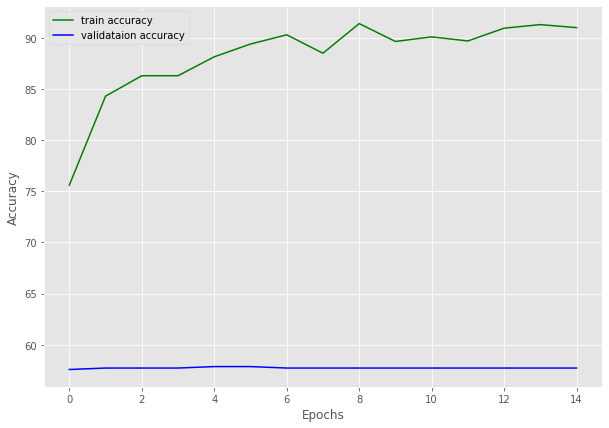

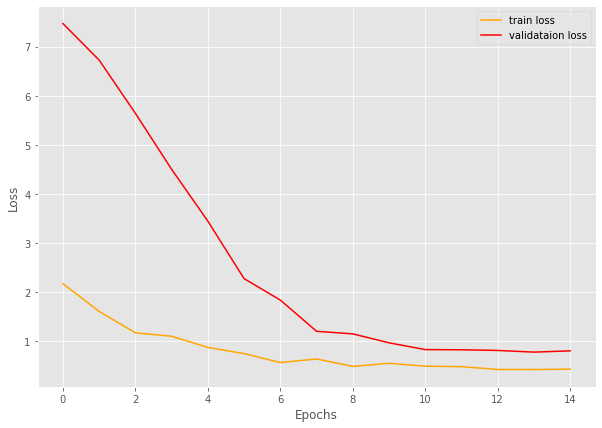

In [ ]:
# Save the trained model weights.
save_model(epochs, model2, optimizer, criterion2)
# Save the loss and accuracy plots.
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')